In-lab activity: Fill in the applyCanny and applyHarris functions and determine the best parameters to rectify the document in the provided examples images.  An example for an rectified image is at the bottom.

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

"""
image = gray image (single channel 8-bit image)
threshold1 (low) = first threshold (lowest accepted)
threshold2 (high) = second threshold (highest value accepted)
ksize = size of the Sobel() operator
Returns edges image 
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_canny/py_canny.html
"""
def applyCanny(src, low, high, ksize):
    #TODO - blur the src image
    #TODO - apply Canny and return the edges image (cannyImage) 
    return cannyImage

"""
img - Input image, it should be grayscale and float32 type.
blockSize - It is the size of neighbourhood considered for corner detection
ksize - Aperture parameter of Sobel derivative used.
k - Harris detector free parameter in the equation.
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
"""
def applyHarris(src, keep_top, blockSize, ksize, k=0.04):
    #TODO - Apply the harris to the source image
    #TODO - return the keep_top results as a binary image (harrisImage)
    return harrisImage

# You are going to find the points on the image so we can rectify the document in the image
# You're going to get an edge map using the Canny algorithm and then use the Harris corners
# to get keypoints
#  - Try to play around with the different parameters to get the best results
def getKeyPoints(gray):
    canny = applyCanny(gray, TODO)
    harris = applyHarris(canny, TODO)
    return harris, canny


In [5]:
print("Load image")
image_fn = "images/example_01.png"
img = cv2.imread(image_fn)
vis = img.copy()[::-1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

harris,canny = getKeyPoints(gray)
fig, ax = plt.subplots(1, 3, figsize=(15,15))
ax[0].imshow(vis)
ax[1].imshow(canny, cmap='gray')
ax[2].imshow(harris, cmap='gray')
plt.show()

Load image


NameError: name 'TODO' is not defined

In [9]:
#Helper function - order the provided 4 points clockwise
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect

# It's pretty hard to just get the corners in an image, so we're going to do some filtering
# by using the opencv findContours to get the largest external connected points from our Harris output and return
# the rectangle
def getCorners(dst):
    dst = np.uint8(dst)
    cnts = cv2.findContours(dst, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c = max(cnts[1], key=cv2.contourArea)

    # determine the most extreme points along the contour
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    pts = np.array([extLeft,extRight,extTop,extBot])
    rect = order_points(pts)
    return rect


In [10]:

rect = getCorners(harris)

h,w,c = img.shape
vis = np.zeros((h,w,3), dtype=np.uint8)
cv2.circle(vis, tuple(rect[0]), 8, (0, 0, 255), -1)
cv2.circle(vis, tuple(rect[1]), 8, (0, 255, 0), -1)
cv2.circle(vis, tuple(rect[2]), 8, (255, 0, 0), -1)
cv2.circle(vis, tuple(rect[3]), 8, (255, 255, 0), -1)
plt.imshow(vis)
plt.plot()

NameError: name 'harris' is not defined

In [11]:
#Convert the document rectangle in the image to a right-angle rectangle
#This is out of scope for this course so you don't have to know the nitty-gritty
#This is based on code from PyImageSearch
def rectify(rect,img):
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
            [0, 0],
            [maxWidth - 1, 0],
            [maxWidth - 1, maxHeight - 1],
            [0, maxHeight - 1]], dtype = "float32")

      
    # compute the transform and then apply it using RANSAC 
    # this is out of scope, so you can ignore it
    (H, status) = cv2.findHomography(rect, dst, cv2.RANSAC, 0.4)
    warped = cv2.warpPerspective(img, H, (maxWidth, maxHeight))

    # return the rectified image
    return warped

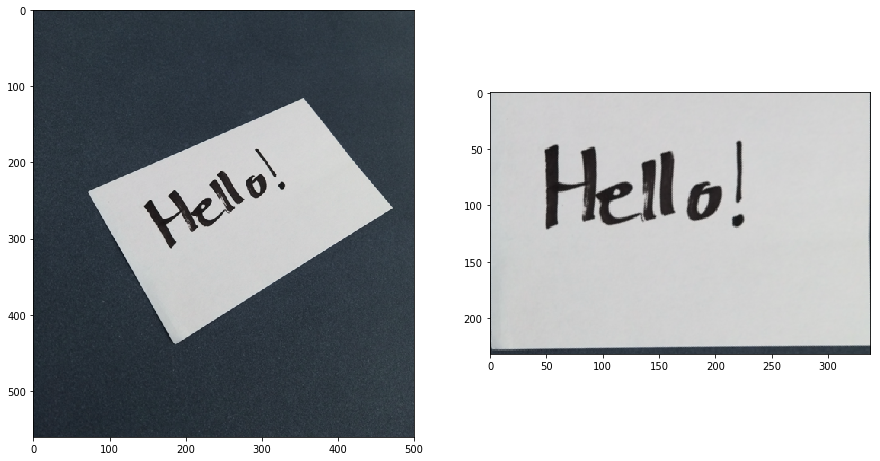

In [13]:
# Expected output: These are the manually determined edges of the document
manual_pts =  {'images/example_01.png' : np.array([(73, 239), (356, 117), (475, 265), (187, 443)]),
               'images/example_02.png' : np.array([(101, 185), (393, 151), (479, 323), (187, 441)]),
               'images/example_03.png' : np.array([(63, 242), (291, 110), (361, 252), (78, 386)])}

#TODO - comment this out when doing the inlab activity
rect = manual_pts[image_fn]
warped = rectify(rect,img)


fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(img)
ax[1].imshow(warped)
plt.show()
